In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from lightgbm import LGBMClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
train = pd.read_csv('/content/drive/MyDrive/zindi2/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/zindi2/Test.csv')

In [3]:
train.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,Other relative (e.g. in-laws or aunt/uncle) of...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,Father/mother/stepfather/stepmother of person 01,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

In [6]:
# Insatlling catboost and Regularide Greedy Forest

!pip install catboost rgf_python

     |████████████████████████████████| 67.3MB 45kB/s 
     |████████████████████████████████| 768kB 34.1MB/s 


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [12]:
# Importing neccesary libraries for modelling

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [82]:
train = pd.read_csv('/content/drive/MyDrive/zindi2/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/zindi2/Test.csv')

In [83]:
test.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business',
       'nature_of_work'],
      dtype='object')

In [11]:
train.gender = le.fit_transform(train.gender).astype(np.uint8)
test.gender = le.fit_transform(test.gender).astype(np.uint8)

train.race = le.fit_transform(train.race).astype(np.uint8)
test.race = le.fit_transform(test.race).astype(np.uint8)

train.dwelling = le.fit_transform(train.dwelling).astype(np.uint8)
test.dwelling = le.fit_transform(test.dwelling).astype(np.uint8)

train.dwelling_type = le.fit_transform(train.dwelling_type).astype(np.uint8)
test.dwelling_type = le.fit_transform(test.dwelling_type).astype(np.uint8)

train.province_code = le.fit_transform(train.province_code).astype(np.uint8)
test.province_code = le.fit_transform(test.province_code).astype(np.uint8)

train.metro_code = le.fit_transform(train.metro_code).astype(np.uint8)
test.metro_code = le.fit_transform(test.metro_code).astype(np.uint8)

train.nationality	= le.fit_transform(train.nationality	).astype(np.uint8)
test.nationality = le.fit_transform(test.nationality	).astype(np.uint8)

train.RTH	= le.fit_transform(train.RTH).astype(np.uint8)
test.RTH= le.fit_transform(test.RTH).astype(np.uint8)

train.marital_st	= le.fit_transform(train.marital_st).astype(np.uint8)
test.marital_st= le.fit_transform(test.marital_st).astype(np.uint8)

train.Lang_inside	= le.fit_transform(train.Lang_inside	).astype(np.uint8)
test.Lang_inside= le.fit_transform(test.Lang_inside	).astype(np.uint8)

train.Lang_outside= le.fit_transform(train.Lang_outside	).astype(np.uint8)
test.Lang_outside	= le.fit_transform(test.Lang_outside).astype(np.uint8)

train.Education= le.fit_transform(train.Education).astype(np.uint8)
test.Education	= le.fit_transform(test.Education).astype(np.uint8)

train.nature_of_work	= le.fit_transform(train.nature_of_work	).astype(np.uint8)
test.nature_of_work	= le.fit_transform(test.nature_of_work	).astype(np.uint8)

train.lw_business	= le.fit_transform(train.lw_business).astype(np.uint8)
test.lw_business= le.fit_transform(test.lw_business	).astype(np.uint8)

train.lw_work	= le.fit_transform(train.lw_work).astype(np.uint8)
test.lw_work= le.fit_transform(test.lw_work).astype(np.uint8)

train.help_on_household	= le.fit_transform(train.help_on_household).astype(np.uint8)
test.help_on_household= le.fit_transform(test.help_on_household).astype(np.uint8)

train.job_or_business	= le.fit_transform(train.job_or_business).astype(np.uint8)
test.job_or_business= le.fit_transform(test.job_or_business).astype(np.uint8)



X = train.drop(['ID', 'target'], axis =1)
y = train.target

In [143]:
train.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

In [144]:
train.head(1)

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,0,20,0,2,0,6,14,66710095,1,8,4,14,9,9,1,1,1,1,3,0


In [145]:
train.shape

(7736, 21)

In [146]:
print('Number of class 1 samples before:',X[y == 1].shape[0])

Number of class 1 samples before: 605


In [147]:
X_upsampled, y_upsampled = resample(X[y == 1],y[y == 1],replace=True,n_samples=X[y == 0].shape[0],random_state=123)
print('Number of class 1 samples after:',X_upsampled.shape[0])

Number of class 1 samples after: 7131


In [148]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [149]:
X

,gender,age,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,0,20,9,1,1,1,1,3
1,0,42,11,3,1,1,2,4
2,0,86,32,1,1,1,1,3
3,0,20,11,1,1,1,1,3
4,0,26,11,1,1,1,1,3
...,...,...,...,...,...,...,...,...
7731,0,55,14,1,1,1,1,3
7732,0,22,11,3,1,1,2,5
7733,0,38,6,3,1,1,2,7
7734,0,52,9,1,1,1,1,3


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, stratify = y_bal, test_size=0.2, random_state=random)

In [151]:
cat = CatBoostClassifier(iterations=1500)
lgm = LGBMClassifier(n_estimators=1500)

classifier = [lgm,cat]
classifier_names = ['LR','CAT']

In [152]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test,pred)
        print(f'{classifier_names[i]}:{roc}')
    
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
        fpr, tpr, _ = roc_curve(labels, predictions)
    return fpr, tpr

In [153]:
pred(classifier)

LR:0.8794676598676496
Learning rate set to 0.020086
0:	learn: 0.6919978	total: 6.81ms	remaining: 10.2s
1:	learn: 0.6907983	total: 13.7ms	remaining: 10.2s
2:	learn: 0.6898815	total: 20.7ms	remaining: 10.3s
3:	learn: 0.6888233	total: 27ms	remaining: 10.1s
4:	learn: 0.6878375	total: 33.5ms	remaining: 10s
5:	learn: 0.6872781	total: 37.5ms	remaining: 9.34s
6:	learn: 0.6860415	total: 44.2ms	remaining: 9.42s
7:	learn: 0.6853524	total: 50.9ms	remaining: 9.5s
8:	learn: 0.6846259	total: 57.5ms	remaining: 9.53s
9:	learn: 0.6836177	total: 64.2ms	remaining: 9.56s
10:	learn: 0.6827862	total: 70.6ms	remaining: 9.56s
11:	learn: 0.6819248	total: 77.1ms	remaining: 9.56s
12:	learn: 0.6813303	total: 83.4ms	remaining: 9.54s
13:	learn: 0.6805548	total: 89.9ms	remaining: 9.54s
14:	learn: 0.6798091	total: 96.6ms	remaining: 9.56s
15:	learn: 0.6792374	total: 103ms	remaining: 9.57s
16:	learn: 0.6785236	total: 109ms	remaining: 9.53s
17:	learn: 0.6779504	total: 116ms	remaining: 9.51s
18:	learn: 0.6773702	total: 12

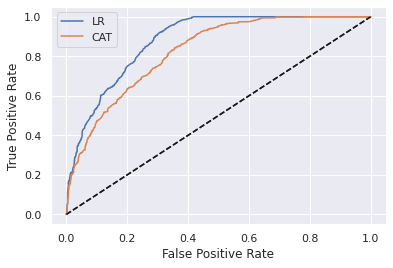

In [154]:
plt.figure()
for i, model in enumerate(classifier):
    fpr, tpr = test_roc(model, X_test, y_test)
    plt.plot(fpr, tpr, label=classifier_names[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

In [155]:
vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
vcf.fit(X,y)


Learning rate set to 0.017016
0:	learn: 0.6751033	total: 3.98ms	remaining: 5.97s
1:	learn: 0.6581903	total: 7.91ms	remaining: 5.92s
2:	learn: 0.6420984	total: 11.2ms	remaining: 5.58s
3:	learn: 0.6264752	total: 14.6ms	remaining: 5.46s
4:	learn: 0.6115434	total: 18ms	remaining: 5.38s
5:	learn: 0.5972211	total: 21.4ms	remaining: 5.32s
6:	learn: 0.5837096	total: 24.4ms	remaining: 5.2s
7:	learn: 0.5702891	total: 27.8ms	remaining: 5.19s
8:	learn: 0.5577458	total: 31.5ms	remaining: 5.21s
9:	learn: 0.5457348	total: 35ms	remaining: 5.22s
10:	learn: 0.5342578	total: 38.5ms	remaining: 5.21s
11:	learn: 0.5233349	total: 41.8ms	remaining: 5.18s
12:	learn: 0.5124867	total: 45.2ms	remaining: 5.17s
13:	learn: 0.5024592	total: 48.8ms	remaining: 5.18s
14:	learn: 0.4926516	total: 52.3ms	remaining: 5.17s
15:	learn: 0.4834434	total: 55.9ms	remaining: 5.19s
16:	learn: 0.4746035	total: 59.9ms	remaining: 5.22s
17:	learn: 0.4660187	total: 63.4ms	remaining: 5.22s
18:	learn: 0.4579400	total: 67ms	remaining: 5.22s

VotingClassifier(estimators=[('lr',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=1500, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
                                             subsampl

In [138]:
sub = pd.DataFrame({'ID':test.ID, 'target':prediction})

In [139]:
sub.to_csv('/content/drive/MyDrive/zindi2/vcf_cat_lgb_submission.csv', index = False)

In [7]:
test_x=test.drop('ID', axis =1)

In [8]:
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    print("Train AUC : {} \t Val AUC : {}".format(train_auc, test_auc))
    return test_auc

In [9]:
# Importing neccesary libraries for modelling

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [14]:
# for seed value 64

preds, scores = [], []
 
seed = 64
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 

X = train.drop(['ID', 'target'], axis =1)
y = train.target
test_x=test.drop('ID', axis =1)
 
i = 30
for train_index, test_index in skf.split(X, y):
  print("Number of splits left {0} to train.".format(i))
  x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
  pipe.fit(x_train, y_train)
  score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
  scores.append(score) 
  pred = pipe.predict_proba(test_x)[:, 1]
  preds.append(pred)
  print(score)
  i -= 1
 
np.mean(scores) #LB Score 0.84532655

Number of splits left 30 to train.
0.7296218487394959
Number of splits left 29 to train.
0.6426470588235295
Number of splits left 28 to train.
0.5968487394957983
Number of splits left 27 to train.
0.5464285714285715
Number of splits left 26 to train.
0.48361344537815126
Number of splits left 25 to train.
0.5300420168067227
Number of splits left 24 to train.
0.6890756302521008
Number of splits left 23 to train.
0.7264705882352941
Number of splits left 22 to train.
0.7836134453781513
Number of splits left 21 to train.
0.5403361344537815
Number of splits left 20 to train.
0.7102941176470589
Number of splits left 19 to train.
0.6159663865546219
Number of splits left 18 to train.
0.6392857142857143
Number of splits left 17 to train.
0.7126050420168067
Number of splits left 16 to train.
0.5630252100840336
Number of splits left 15 to train.
0.6243697478991597
Number of splits left 14 to train.
0.611764705882353
Number of splits left 13 to train.
0.76890756302521
Number of splits left 12 to tr

0.6534972737336847

In [16]:
ss = pd.read_csv("/content/drive/My Drive/zindi2/SampleSubmission.csv")
p = np.mean(preds, axis=0)
ss["target"] = p
ss.to_csv("/content/drive/My Drive/zindi2/64.csv", index=False)

In [18]:
# for seed value 64

preds, scores = [], []
 
seed = 45
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 

X = train.drop(['ID', 'target'], axis =1)
y = train.target
test_x=test.drop('ID', axis =1)
 
i = 30
for train_index, test_index in skf.split(X, y):
  print("Number of splits left {0} to train.".format(i))
  x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
  pipe.fit(x_train, y_train)
  score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
  scores.append(score) 
  pred = pipe.predict_proba(test_x)[:, 1]
  preds.append(pred)
  print(score)
  i -= 1
 
np.mean(scores) 

Number of splits left 30 to train.
0.5392857142857143
Number of splits left 29 to train.
0.6632352941176471
Number of splits left 28 to train.
0.6491596638655461
Number of splits left 27 to train.
0.8142857142857143
Number of splits left 26 to train.
0.5632352941176471
Number of splits left 25 to train.
0.7126050420168067
Number of splits left 24 to train.
0.6838235294117647
Number of splits left 23 to train.
0.6976890756302521
Number of splits left 22 to train.
0.4592436974789916
Number of splits left 21 to train.
0.6724789915966387
Number of splits left 20 to train.
0.7168067226890756
Number of splits left 19 to train.
0.538655462184874
Number of splits left 18 to train.
0.7588235294117647
Number of splits left 17 to train.
0.6632352941176471
Number of splits left 16 to train.
0.6796218487394958
Number of splits left 15 to train.
0.7598739495798319
Number of splits left 14 to train.
0.6069327731092437
Number of splits left 13 to train.
0.6672268907563025
Number of splits left 12 to t

0.6605567276136897

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/zindi2/SampleSubmission.csv')
ss['target'] = np.mean(preds, axis=0)
ss.to_csv('/content/drive/My Drive/zindi2/4ie.csv', index=False)